In [1]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print("✓ Bibliothèques chargées avec succès!")

✓ Bibliothèques chargées avec succès!


In [2]:
# Données de l'expérience
temps = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5,
7.0, 7.5, 8.0]
densite_optique = [0.05, 0.07, 0.10, 0.15, 0.22, 0.33, 0.50, 0.75, 1.12,
1.68,2.52, 3.15, 3.45, 3.58, 3.62, 3.63, 3.63]
# Créer un tableau
donnees = pd.DataFrame({
'Temps (h)': temps,
'DO600': densite_optique
})
print(" Données de croissance bactérienne")
print("="*50)
print(donnees)

 Données de croissance bactérienne
    Temps (h)  DO600
0         0.0   0.05
1         0.5   0.07
2         1.0   0.10
3         1.5   0.15
4         2.0   0.22
5         2.5   0.33
6         3.0   0.50
7         3.5   0.75
8         4.0   1.12
9         4.5   1.68
10        5.0   2.52
11        5.5   3.15
12        6.0   3.45
13        6.5   3.58
14        7.0   3.62
15        7.5   3.63
16        8.0   3.63


In [3]:
print("\n STATISTIQUES DE L'EXPÉRIENCE")
print("="*50)
print(f"Durée totale : {max(temps)} heures")
print(f"Nombre de mesures : {len(temps)}")
print(f"DO600 initiale : {min(densite_optique)}")
print(f"DO600 maximale : {max(densite_optique)}")
print(f"Augmentation : {max(densite_optique) - min(densite_optique):.2f}")


 STATISTIQUES DE L'EXPÉRIENCE
Durée totale : 8.0 heures
Nombre de mesures : 17
DO600 initiale : 0.05
DO600 maximale : 3.63
Augmentation : 3.58


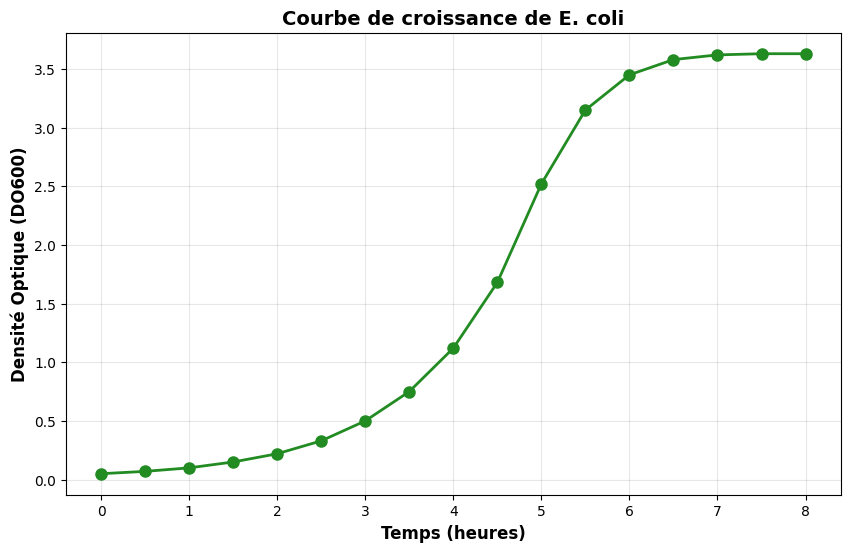

✓ Graphique sauvegardé : courbe_croissance.png


In [4]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(temps, densite_optique, 'o-', linewidth=2, markersize=8,
color='forestgreen')
plt.xlabel('Temps (heures)', fontsize=12, fontweight='bold')
plt.ylabel('Densité Optique (DO600)', fontsize=12, fontweight='bold')
plt.title('Courbe de croissance de E. coli', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('courbe_croissance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé : courbe_croissance.png")

In [5]:
# Filtrer la phase exponentielle
phase_expo = donnees[(donnees['DO600'] >= 0.1) & (donnees['DO600'] <= 2.0)]
print(" PHASE DE CROISSANCE EXPONENTIELLE")
print("="*50)
print(phase_expo)
print(f"\nDurée : {phase_expo['Temps (h)'].max() - phase_expo['Temps (h)'].min():.1f} heures")

 PHASE DE CROISSANCE EXPONENTIELLE
   Temps (h)  DO600
2        1.0   0.10
3        1.5   0.15
4        2.0   0.22
5        2.5   0.33
6        3.0   0.50
7        3.5   0.75
8        4.0   1.12
9        4.5   1.68

Durée : 3.5 heures


In [6]:
from scipy import stats as scipy_stats
# Calcul logarithmique
phase_expo_log = phase_expo.copy()
phase_expo_log['ln_DO600'] = np.log(phase_expo_log['DO600'])
# Régression linéaire
slope, intercept, r_value, p_value, std_err = scipy_stats.linregress(
phase_expo_log['Temps (h)'],
phase_expo_log['ln_DO600']
)
mu = slope
temps_doublement = np.log(2) / mu
temps_doublement_min = temps_doublement * 60
print(" PARAMÈTRES DE CROISSANCE")
print("="*50)
print(f"Taux de croissance (μ) : {mu:.3f} h−1")
print(f"Temps de doublement : {temps_doublement:.2f} heures")
print(f" = {temps_doublement_min:.1f} minutes")
print(f"\n Les bactéries doublent toutes les {temps_doublement_min:.0f} minutes")

 PARAMÈTRES DE CROISSANCE
Taux de croissance (μ) : 0.807 h−1
Temps de doublement : 0.86 heures
 = 51.5 minutes

 Les bactéries doublent toutes les 52 minutes


In [7]:
# Créer un rapport
resume = f"""
╔══════════════════════════════════════════════════════════════╗
║ RAPPORT - Croissance bactérienne E. coli ║
╚══════════════════════════════════════════════════════════════╝
Durée expérience : {max(temps)} heures
Mesures : {len(temps)}
RÉSULTATS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━
• DO600 initiale : {min(densite_optique):.3f}
• DO600 maximale : {max(densite_optique):.3f}
• Temps de doublement : {temps_doublement_min:.1f} minutes
• Phase exponentielle : {phase_expo['Temps (h)'].min():.1f}h -
{phase_expo['Temps (h)'].max():.1f}h
CONCLUSION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━
Croissance typique de E. coli avec un temps de doublement
de {temps_doublement_min:.0f} minutes (normal : 20-30 min en milieu riche).
"""
print(resume)
# Sauvegarder
with open('rapport_analyse.txt', 'w', encoding='utf-8') as f: f.write(resume)
print("✓ Rapport sauvegardé : rapport_analyse.txt")


╔══════════════════════════════════════════════════════════════╗
║ RAPPORT - Croissance bactérienne E. coli ║
╚══════════════════════════════════════════════════════════════╝
Durée expérience : 8.0 heures
Mesures : 17
RÉSULTATS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━
• DO600 initiale : 0.050
• DO600 maximale : 3.630
• Temps de doublement : 51.5 minutes
• Phase exponentielle : 1.0h -
4.5h
CONCLUSION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━
Croissance typique de E. coli avec un temps de doublement
de 52 minutes (normal : 20-30 min en milieu riche).

✓ Rapport sauvegardé : rapport_analyse.txt


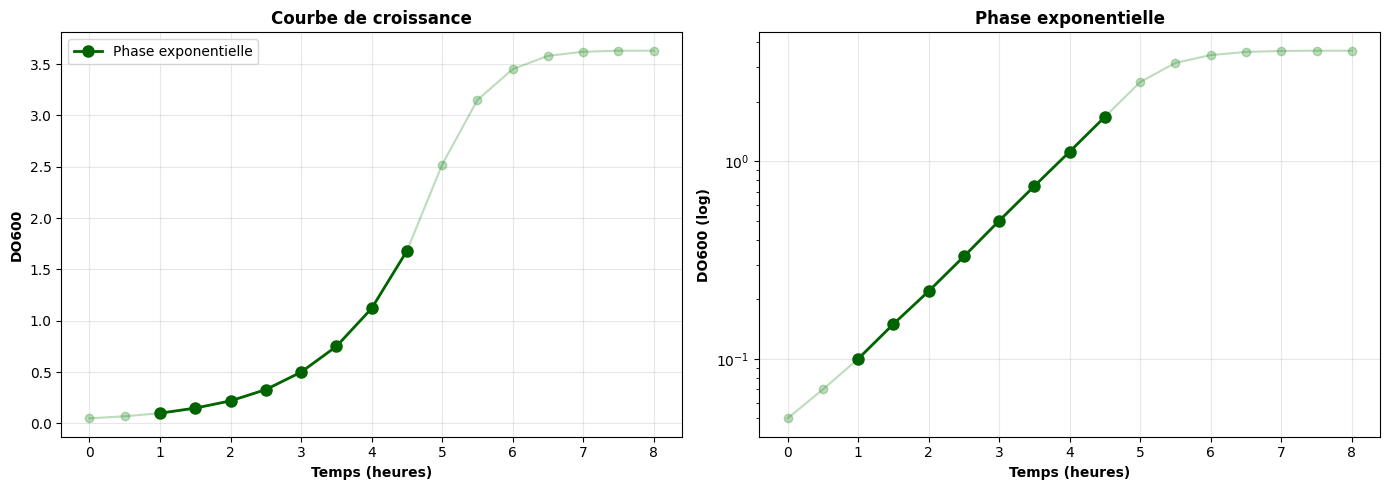

✓ Graphique sauvegardé : phase_exponentielle.png


In [8]:
# Graphique avancé
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Graphique 1
ax1.plot(temps, densite_optique, 'o-', color='forestgreen', alpha=0.3)
ax1.plot(phase_expo['Temps (h)'], phase_expo['DO600'], 'o-',
color='darkgreen', linewidth=2, markersize=8, label='Phase exponentielle')
ax1.set_xlabel('Temps (heures)', fontweight='bold')
ax1.set_ylabel('DO600', fontweight='bold')
ax1.set_title('Courbe de croissance', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
# Graphique 2 - Échelle logarithmique
ax2.semilogy(temps, densite_optique, 'o-', color='forestgreen', alpha=0.3)
ax2.semilogy(phase_expo['Temps (h)'], phase_expo['DO600'], 'o-',
color='darkgreen', linewidth=2, markersize=8)
ax2.set_xlabel('Temps (heures)', fontweight='bold')
ax2.set_ylabel('DO600 (log)', fontweight='bold')
ax2.set_title('Phase exponentielle', fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('phase_exponentielle.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé : phase_exponentielle.png")